<a href="https://colab.research.google.com/github/rsztjnxz/CS634-hw2-2-/blob/main/CS634_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [177]:

!gdown https://drive.google.com/uc?export=download&id=1eIHm56FPV2B0VOW6fgf2tQWEu-tkk36w


Downloading...
From: https://drive.google.com/uc?export=download
To: /content/uc?export=download
1.69kB [00:00, 4.00MB/s]


#Read the data

In [178]:
from locale import D_T_FMT
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt


df = pd.read_csv('/content/nyc_bb_bicyclist_counts.csv')

df.head()

,Date,HIGH_T,LOW_T,PRECIP,BB_COUNT
0,1-Apr-17,46.0,37.0,0.00,606
1,2-Apr-17,62.1,41.0,0.00,2021
2,3-Apr-17,63.0,50.0,0.03,2470
3,4-Apr-17,51.1,46.0,1.18,723
4,5-Apr-17,63.0,46.0,0.00,2807


#Plot the hist of BB_Count

Text(0.5, 0, 'times')

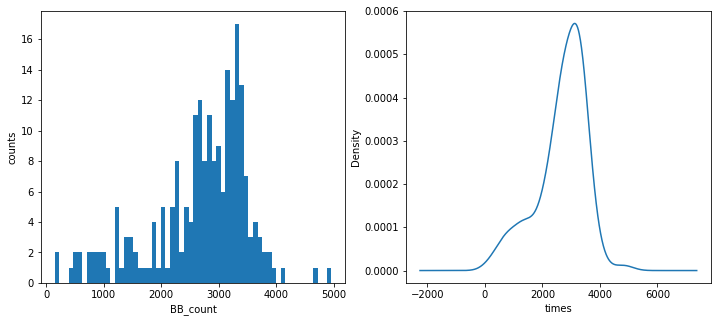

In [34]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.hist(df.BB_COUNT,bins=60)
plt.xlabel('BB_count');plt.ylabel('counts')

plt.subplot(122)
df.BB_COUNT.plot(kind='kde')
plt.xlabel('times')

# Guess data follow Poisson distribution and Plot a Poisson distribution with parameter = mean of data.

<function matplotlib.pyplot.show(*args, **kw)>

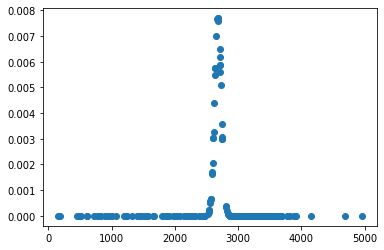

In [173]:
from scipy.stats import poisson

y = poisson.pmf(np.array(df.BB_COUNT),mu=df.BB_COUNT.mean(),loc=0)

plt.scatter(np.array(df.BB_COUNT),y)
plt.show


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


(0.0, 80.0)

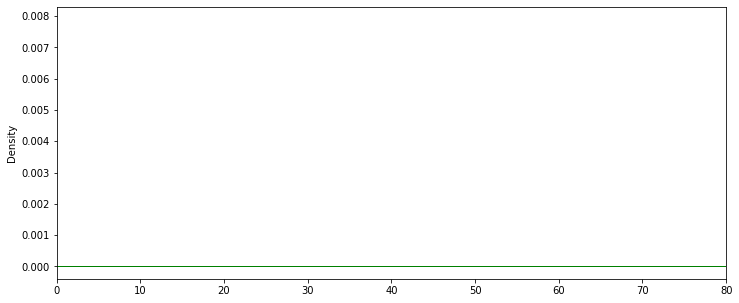

In [115]:
lambda_=df.BB_COUNT.mean()

def poisson(k,lambda_=lambda_):
    return np.e**(-lambda_) * lambda_**k/np.math.factorial(k)

predict = [poisson(k) for k in range(100)]

plt.figure(figsize=(12,5))
plt.plot(range(100),predict,linewidth=1,color='green')
test = pd.Series([stats.poisson.rvs(lambda_) for i in range(10000)])
test.plot(kind = 'kde',linewidth=1,linestyle='--',color='red')
plt.xlim(0,80)

In [162]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import time
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import numpy as np
from scipy.stats import poisson

In [161]:
data=df.BB_COUNT
data.std()
#data.mean()

854.7108635057903

In [163]:
data=df.BB_COUNT
mean=data.mean()
std=data.std()
def neg_log_likelihood(data, mean, std):

    return -sum([np.log(poisson.pmf(x, mean, std)) for x in data])

In [152]:
def gradient_mean(data, mean, std):
    return -(sum([x - mean for x in data])/np.square(std))

In [153]:
def gradient_std(data, mean, std):
    return (len(data/std - sum(np.square([x - mean for x in data]))/(std**3)))

In [154]:
def update_weights(data, mean, std, learning_rate):
    new_mean = mean - learning_rate * gradient_mean(data, mean, std)
    
    new_std = std - learning_rate * gradient_std(data, mean, std)
    
    return new_mean, new_std

In [165]:
def stocastic_gradient_descent(data, n_iter = 1000, learning_rate = .1,batch_size = 14, tolerance = .0001):
    
    start_time = time.time()
    
    if len(data) <= 1:
        raise ValueError('Re-Check the data list; it must have atleast 2 elements, processing ended !!!')
        
    mean = std = np.random.randint(min(data),max(data)+1)
    
    previous_ll = neg_log_likelihood(data, mean, std)
    

    counter = 0

    for i in range(n_iter):
        for j in range(0, len(data), batch_size):
            
            batch = data[j:j+batch_size]
            
            mean, std = update_weights(batch, mean, std, learning_rate)
        
        ll = neg_log_likelihood(data, mean, std)
        
        change_in_ll = previous_ll - ll
        
        previous_ll = ll
        
        print(f'For Epoch {i+1}, Negative Log Likelihood is {ll}')
        
        if (abs(change_in_ll) < tolerance): counter += 1
        else: counter = 0
        if counter == 10:
            break
    
    if i+1 < n_iter:
        print(f'Search cannot improve more than tolerance of {tolerance} in last 10 epochs \n')
        print(f"With a learning rate of {learning_rate} and {i+1} Epoch it took {str(round(time.time() - start_time, 3))} seconds for Stocastic Gradient descent to complete training \n")
    else:
        print(f'End of Epoch reached, try giving another learning rate for faster and better search \n')
        print(f"With a learning rate of {learning_rate} and {i+1} Epoch it took {str(round(time.time() - start_time, 3))} seconds for Stocastic Gradient descent to train \n")
   
    return mean, std

In [174]:
stocastic_gradient_descent(data, learning_rate=.01)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


For Epoch 1, Negative Log Likelihood is inf
For Epoch 2, Negative Log Likelihood is inf
For Epoch 3, Negative Log Likelihood is inf
For Epoch 4, Negative Log Likelihood is inf
For Epoch 5, Negative Log Likelihood is inf
For Epoch 6, Negative Log Likelihood is inf
For Epoch 7, Negative Log Likelihood is inf
For Epoch 8, Negative Log Likelihood is inf
For Epoch 9, Negative Log Likelihood is inf
For Epoch 10, Negative Log Likelihood is inf
For Epoch 11, Negative Log Likelihood is inf
For Epoch 12, Negative Log Likelihood is inf
For Epoch 13, Negative Log Likelihood is inf
For Epoch 14, Negative Log Likelihood is inf
For Epoch 15, Negative Log Likelihood is inf
For Epoch 16, Negative Log Likelihood is inf
For Epoch 17, Negative Log Likelihood is inf
For Epoch 18, Negative Log Likelihood is inf
For Epoch 19, Negative Log Likelihood is inf
For Epoch 20, Negative Log Likelihood is inf
For Epoch 21, Negative Log Likelihood is inf
For Epoch 22, Negative Log Likelihood is inf
For Epoch 23, Negat

(4724.641765004813, 2584.9999999999413)